In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('../Mobile Price Classification/dataset/train.csv')
df_test = pd.read_csv('../Mobile Price Classification/dataset/test.csv')

In [2]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [5]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

[0.06110562 0.02008495 0.03351252 0.01991427 0.03264003 0.01743239
 0.03558345 0.03432366 0.03626087 0.0332859  0.03408656 0.04705532
 0.04865747 0.38921649 0.0332541  0.03395628 0.03530036 0.01464942
 0.01926089 0.02041944]


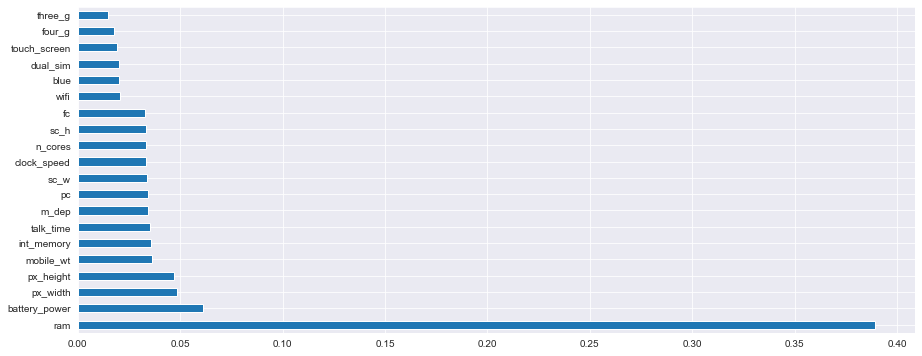

In [6]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df_train.iloc[:, :-1]
y = df_train.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.show()

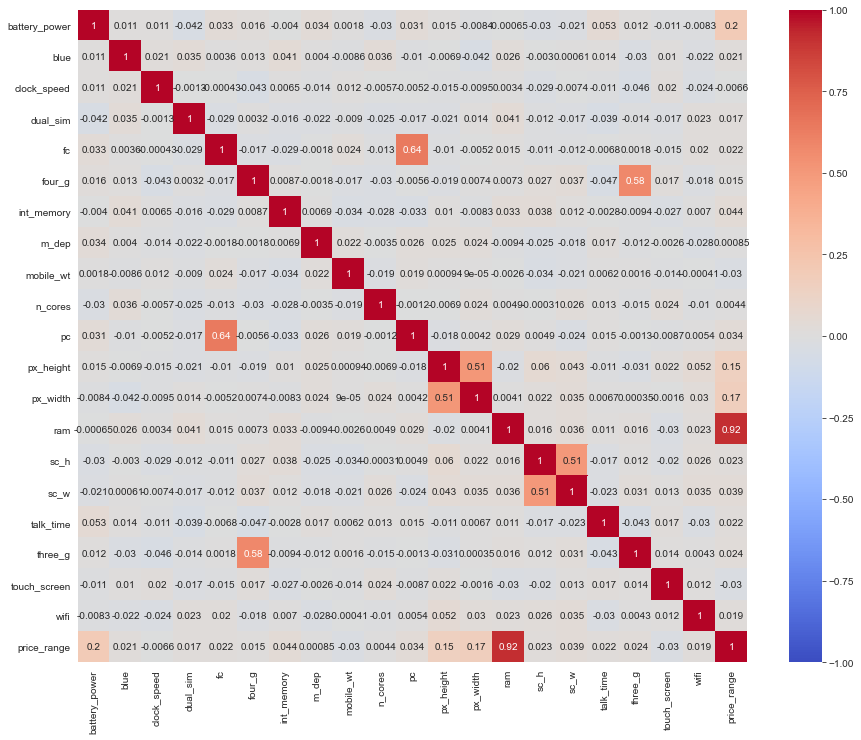

In [7]:
# Heatmap

plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(), vmin=-1, cmap='coolwarm', annot=True);



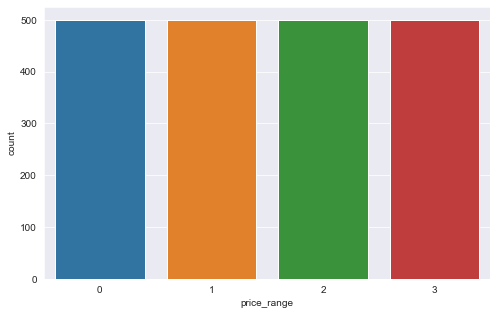

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(df_train['price_range'])
plt.show()

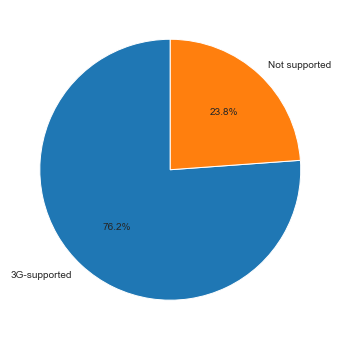

In [9]:
# phone with 3g supported
labels = ["3G-supported",'Not supported']
values = df_train['three_g'].value_counts()

fig, ax = plt.subplots()

ax.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

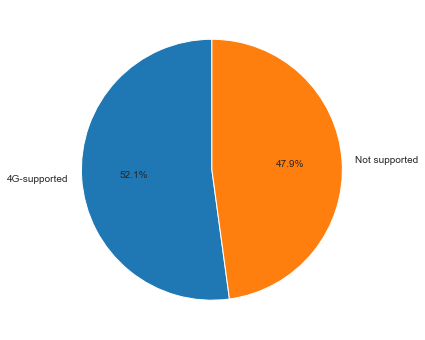

In [10]:
# phone with 4g supported
labels = ["4G-supported",'Not supported']
values = df_train['four_g'].value_counts()

fig, ax = plt.subplots()

ax.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = df_train.drop('price_range',axis=1)
y = df_train['price_range']

scaler.fit(x)
x_transform = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_transform, y, test_size=0.3)

In [12]:
# Fitting Random Forest Regression to the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

regressor = LogisticRegression()
regressor.fit(x_train, y_train)

y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))
print('Score:'+str(regressor.score(x_test,y_test)))

Train Set Accuracy:97.85714285714285
Test Set Accuracy:95.33333333333334

Confusion Matrix:
[[131   5   0   0]
 [  2 149   3   0]
 [  0  10 139   2]
 [  0   0   6 153]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.91      0.97      0.94       154
           2       0.94      0.92      0.93       151
           3       0.99      0.96      0.97       159

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

Score:0.9533333333333334


In [13]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [14]:
lm.score(x_test, y_test)

0.9174763328786614

In [15]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))
print('Score:'+str(knn.score(x_test,y_test)))

Train Set Accuracy:68.71428571428572
Test Set Accuracy:55.00000000000001

Confusion Matrix:
[[108  57   9   0]
 [ 23  62  45   9]
 [  2  42  66  52]
 [  0   3  28  94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       174
           1       0.38      0.45      0.41       139
           2       0.45      0.41      0.43       162
           3       0.61      0.75      0.67       125

    accuracy                           0.55       600
   macro avg       0.56      0.56      0.55       600
weighted avg       0.57      0.55      0.55       600

Score:0.55


In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))
print('Score:'+str(dtree.score(x_test,y_test)))

Train Set Accuracy:100.0
Test Set Accuracy:83.66666666666667

Confusion Matrix:
[[121  19   0   0]
 [ 12 122  16   0]
 [  0  23 117  13]
 [  0   0  15 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       140
           1       0.74      0.81      0.78       150
           2       0.79      0.76      0.78       153
           3       0.92      0.90      0.91       157

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

Score:0.8366666666666667


In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))
print('Score:'+str(rfc.score(x_test,y_test)))

Train Set Accuracy:100.0
Test Set Accuracy:87.83333333333333

Confusion Matrix:
[[127  17   0   0]
 [  6 127  13   0]
 [  0  20 123   5]
 [  0   0  12 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       144
           1       0.77      0.87      0.82       146
           2       0.83      0.83      0.83       148
           3       0.97      0.93      0.95       162

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

Score:0.8783333333333333


In [18]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))
print('Score:'+str(svc.score(x_test,y_test)))

Train Set Accuracy:98.28571428571429
Test Set Accuracy:85.66666666666667

Confusion Matrix:
[[121  15   0   0]
 [ 12 128  18   0]
 [  0  21 117   7]
 [  0   0  13 148]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       136
           1       0.78      0.81      0.80       158
           2       0.79      0.81      0.80       145
           3       0.95      0.92      0.94       161

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

Score:0.8566666666666667


# Price prediction of Test.csv

In [19]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [20]:
df_test = df_test.drop('id',axis=1)

In [21]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_test)
x_transform = scaler.transform(df_test)

In [31]:
predicted_price=rfc.predict(x_transform)

In [32]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 2, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 2, 0, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 3, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

# Adding Predicted price to test.csv

In [33]:
df_test['price_range']=predicted_price

In [34]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
